[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/moshi4/pyGenomeViz/blob/main/docs/getting_started.ipynb)

In [1]:
# Colab environment may require 'RESTART RUNTIME' to activate newly installed packages.
# %pip install pygenomeviz 

## Simple Datasets

### Add Track

- Create [GenomeViz](../api-docs/genomeviz/#pygenomeviz.genomeviz.GenomeViz) class instance
- Add FeatureTrack by [add_feature_track](../api-docs/genomeviz/#pygenomeviz.genomeviz.GenomeViz.add_feature_track) method

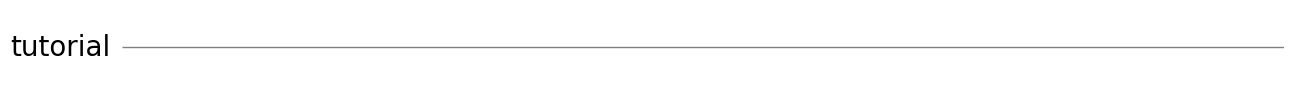

In [2]:
from pygenomeviz import GenomeViz

gv = GenomeViz()
track = gv.add_feature_track(name="tutorial", size=1000)

fig = gv.plotfig()

### Add Features

- Add features by [add_feature](../api-docs/track/#pygenomeviz.track.FeatureTrack.add_feature) method

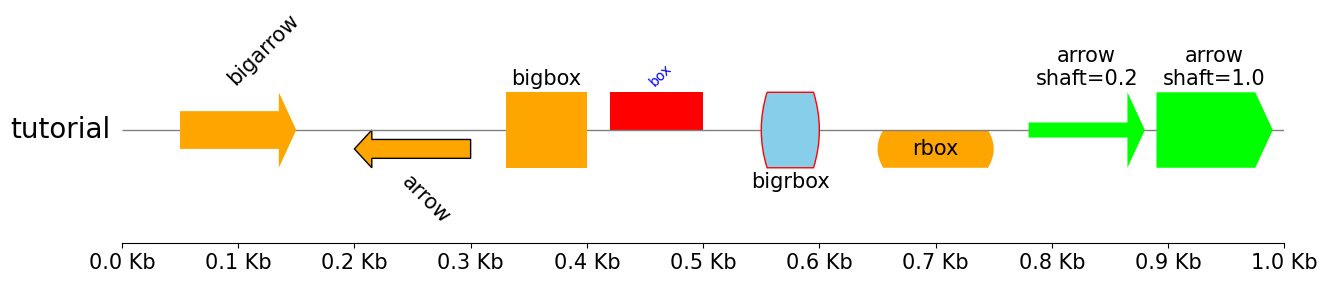

In [3]:
from pygenomeviz import GenomeViz

gv = GenomeViz(tick_style="axis")
track = gv.add_feature_track(name="tutorial", size=1000)

track.add_feature(start=50, end=150, strand=1, label="bigarrow")
track.add_feature(start=200, end=300, strand=-1, plotstyle="arrow", label="arrow", linewidth=1)
track.add_feature(start=330, end=400, strand=1, plotstyle="bigbox", label="bigbox", labelrotation=0, labelha="center")
track.add_feature(start=420, end=500, strand=1, plotstyle="box", label="box", labelcolor="blue", labelsize=10, facecolor="red", )
track.add_feature(start=550, end=600, strand=1, plotstyle="bigrbox", label="bigrbox", labelrotation=0, labelvpos="bottom", labelha="center", facecolor="skyblue", edgecolor="red", linewidth=1)
track.add_feature(start=650, end=750, strand=-1, plotstyle="rbox", label="rbox", labelrotation=0, labelvpos="center", labelha="center")
track.add_feature(start=780, end=880, strand=1, label="arrow\nshaft=0.2", labelrotation=0, labelha="center", arrow_shaft_ratio=0.2, facecolor="lime")
track.add_feature(start=890, end=990, strand=1, label="arrow\nshaft=1.0", labelrotation=0, labelha="center", arrow_shaft_ratio=1.0, facecolor="lime")

fig = gv.plotfig()

### Add Tracks & Features

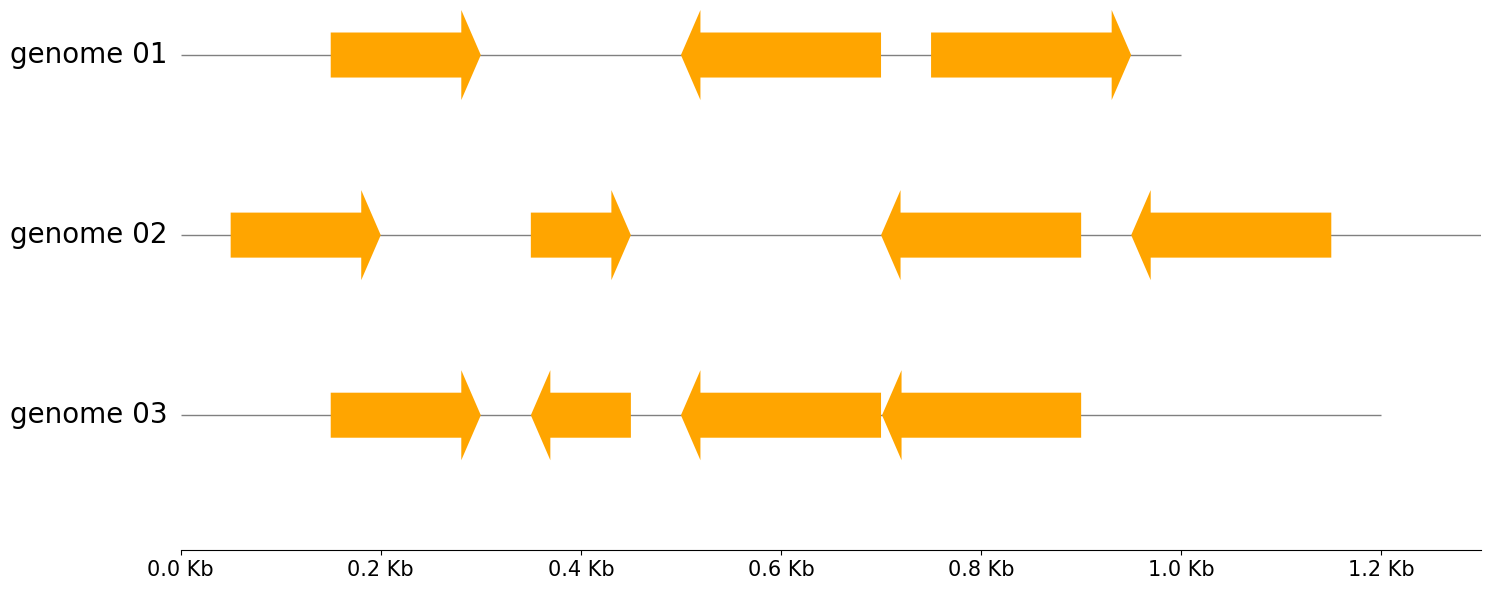

In [4]:
from pygenomeviz import GenomeViz

genome_list = (
    {"name": "genome 01", "size": 1000, "cds_list": ((150, 300, 1), (500, 700, -1), (750, 950, 1))},
    {"name": "genome 02", "size": 1300, "cds_list": ((50, 200, 1), (350, 450, 1), (700, 900, -1), (950, 1150, -1))},
    {"name": "genome 03", "size": 1200, "cds_list": ((150, 300, 1), (350, 450, -1), (500, 700, -1), (701, 900, -1))},
)

gv = GenomeViz(tick_style="axis")
for genome in genome_list:
    name, size, cds_list = genome["name"], genome["size"], genome["cds_list"]
    track = gv.add_feature_track(name, size)
    for cds in cds_list:
        start, end, strand = cds
        track.add_feature(start, end, strand)

fig = gv.plotfig()

### Add Links

- Add links by [add_link](../api-docs/genomeviz/#pygenomeviz.genomeviz.GenomeViz.add_link) method

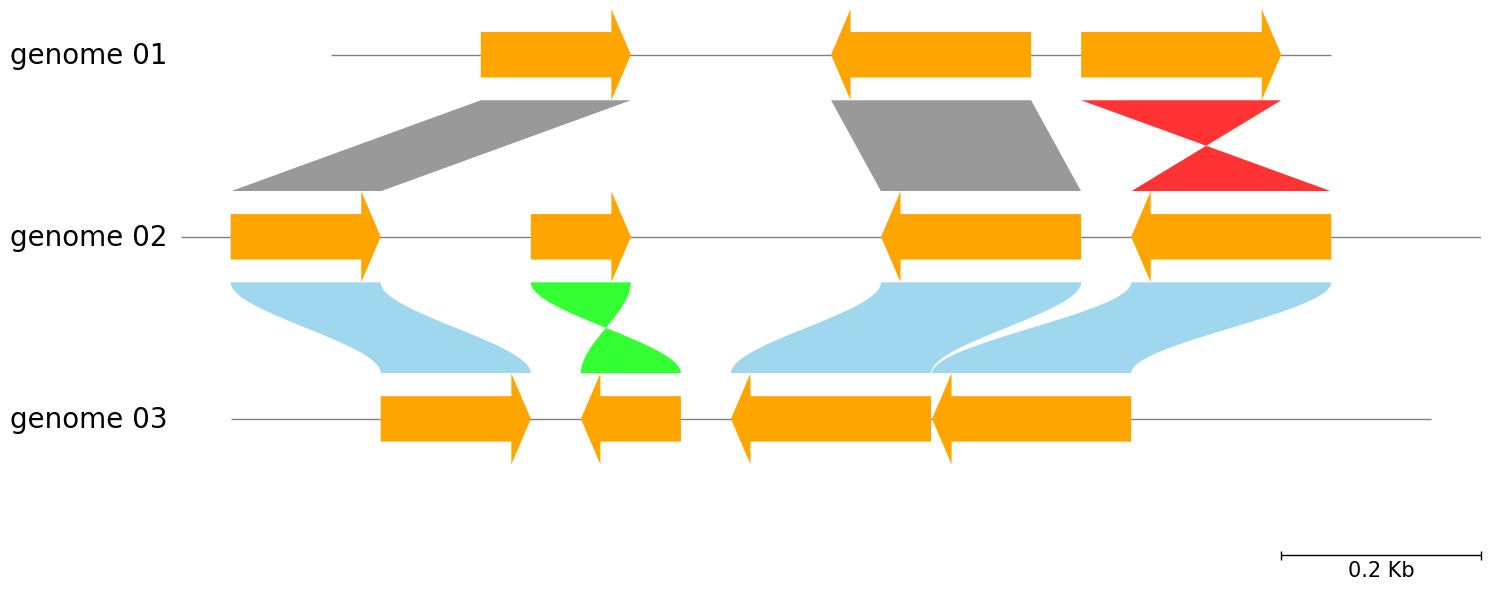

In [5]:
from pygenomeviz import GenomeViz

genome_list = (
    {"name": "genome 01", "size": 1000, "cds_list": ((150, 300, 1), (500, 700, -1), (750, 950, 1))},
    {"name": "genome 02", "size": 1300, "cds_list": ((50, 200, 1), (350, 450, 1), (700, 900, -1), (950, 1150, -1))},
    {"name": "genome 03", "size": 1200, "cds_list": ((150, 300, 1), (350, 450, -1), (500, 700, -1), (701, 900, -1))},
)

gv = GenomeViz(align_type="center", tick_style="bar")
for genome in genome_list:
    name, size, cds_list = genome["name"], genome["size"], genome["cds_list"]
    track = gv.add_feature_track(name, size)
    for cds in cds_list:
        start, end, strand = cds
        track.add_feature(start, end, strand)

# Add links between "genome 01" and "genome 02"
gv.add_link(("genome 01", 150, 300), ("genome 02", 50, 200))
gv.add_link(("genome 01", 700, 500), ("genome 02", 900, 700))
gv.add_link(("genome 01", 750, 950), ("genome 02", 1150, 950))
# Add links between "genome 02" and "genome 03"
gv.add_link(("genome 02", 50, 200), ("genome 03", 150, 300), normal_color="skyblue", inverted_color="lime", curve=True)
gv.add_link(("genome 02", 350, 450), ("genome 03", 450, 350), normal_color="skyblue", inverted_color="lime", curve=True)
gv.add_link(("genome 02", 900, 700), ("genome 03", 700, 500), normal_color="skyblue", inverted_color="lime", curve=True)
gv.add_link(("genome 03", 900, 701), ("genome 02", 1150, 950), normal_color="skyblue", inverted_color="lime", curve=True)

fig = gv.plotfig()

### Add Exon Features

- Add exon features by [add_exon_feature](../api-docs/track/#pygenomeviz.track.FeatureTrack.add_exon_feature) method

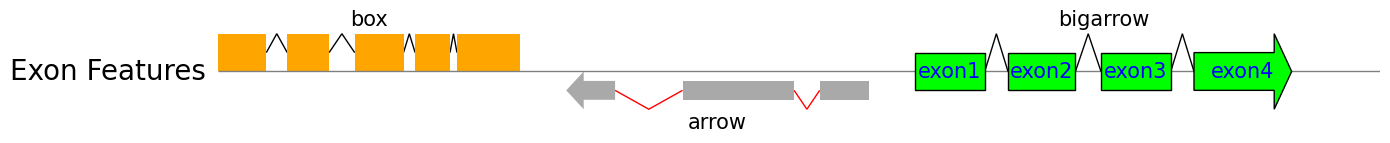

In [6]:
from pygenomeviz import GenomeViz

exon_regions1 = [(0, 210), (300, 480), (590, 800), (850, 1000), (1030, 1300)]
exon_regions2 = [(1500, 1710), (2000, 2480), (2590, 2800)]
exon_regions3 = [(3000, 3300), (3400, 3690), (3800, 4100), (4200, 4620)]

gv = GenomeViz()
track = gv.add_feature_track(name=f"Exon Features", size=5000)
track.add_exon_feature(exon_regions1, strand=1, plotstyle="box", label="box", labelrotation=0, labelha="center")
track.add_exon_feature(exon_regions2, strand=-1, plotstyle="arrow", label="arrow", labelrotation=0, labelha="center", facecolor="darkgrey", intron_patch_kws={"ec": "red"})

exon_labels = [f"exon{i+1}" for i in range(len(exon_regions3))]
track.add_exon_feature(exon_regions3, strand=1, plotstyle="bigarrow", label="bigarrow", facecolor="lime", linewidth=1, exon_labels=exon_labels, labelrotation=0, labelha="center", exon_label_kws={"y": 0, "va": "center", "color": "blue"})

fig = gv.plotfig()

### Add Tracks & Exon Features

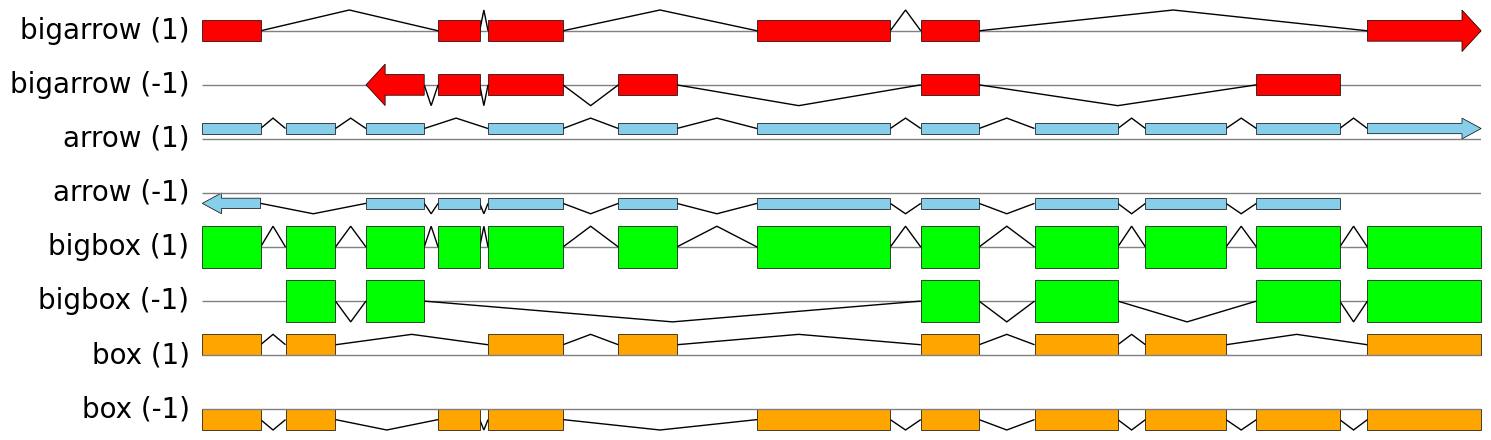

In [7]:
from pygenomeviz import GenomeViz
import random
random.seed(0)

exon_regions = [(0, 210), (300, 480), (590, 800), (850, 1000), (1030, 1300), (1500, 1710), (2000, 2480), (2590, 2800), (3000, 3300), (3400, 3690), (3800, 4100), (4200, 4610)]

gv = GenomeViz(fig_track_height=0.3, link_track_ratio=0.3)
plotstyles = ("bigarrow", "arrow", "bigbox", "box")
colors = ("red", "skyblue", "lime", "orange")
for plotstyle, color in zip(plotstyles, colors):
    for strand in (1, -1):
        track = gv.add_feature_track(name=f"{plotstyle} ({strand})", size=exon_regions[-1][-1])

        sample_num = len(exon_regions) - random.randint(0, int(len(exon_regions) / 2))
        random_sample_exon_regions = sorted(random.sample(exon_regions, sample_num))
        track.add_exon_feature(random_sample_exon_regions, strand, plotstyle=plotstyle, facecolor=color, linewidth=0.5)

fig = gv.plotfig()

## Real Datasets

### Add Track from Genbank file

- Download real datasets by `load_dataset` function  
  It contains Genbank files & Genome comparison links datasets
- Load genbank files by [Genbank](../api-docs/genbank/#pygenomeviz.genbank.Genbank) class
- Add features by [add_genbank_features](../api-docs/track/#pygenomeviz.track.FeatureTrack.add_genbank_features) method

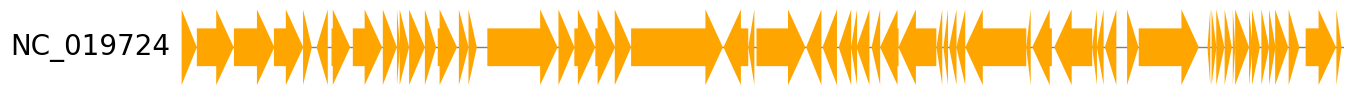

In [8]:
from pygenomeviz import Genbank, GenomeViz, load_dataset

gbk_files, _ = load_dataset("enterobacteria_phage")
gbk = Genbank(gbk_files[0])

gv = GenomeViz()
track = gv.add_feature_track(name=gbk.name, size=gbk.genome_length)
track.add_genbank_features(gbk)

fig = gv.plotfig()

### Add Tracks & Links from Genbank files

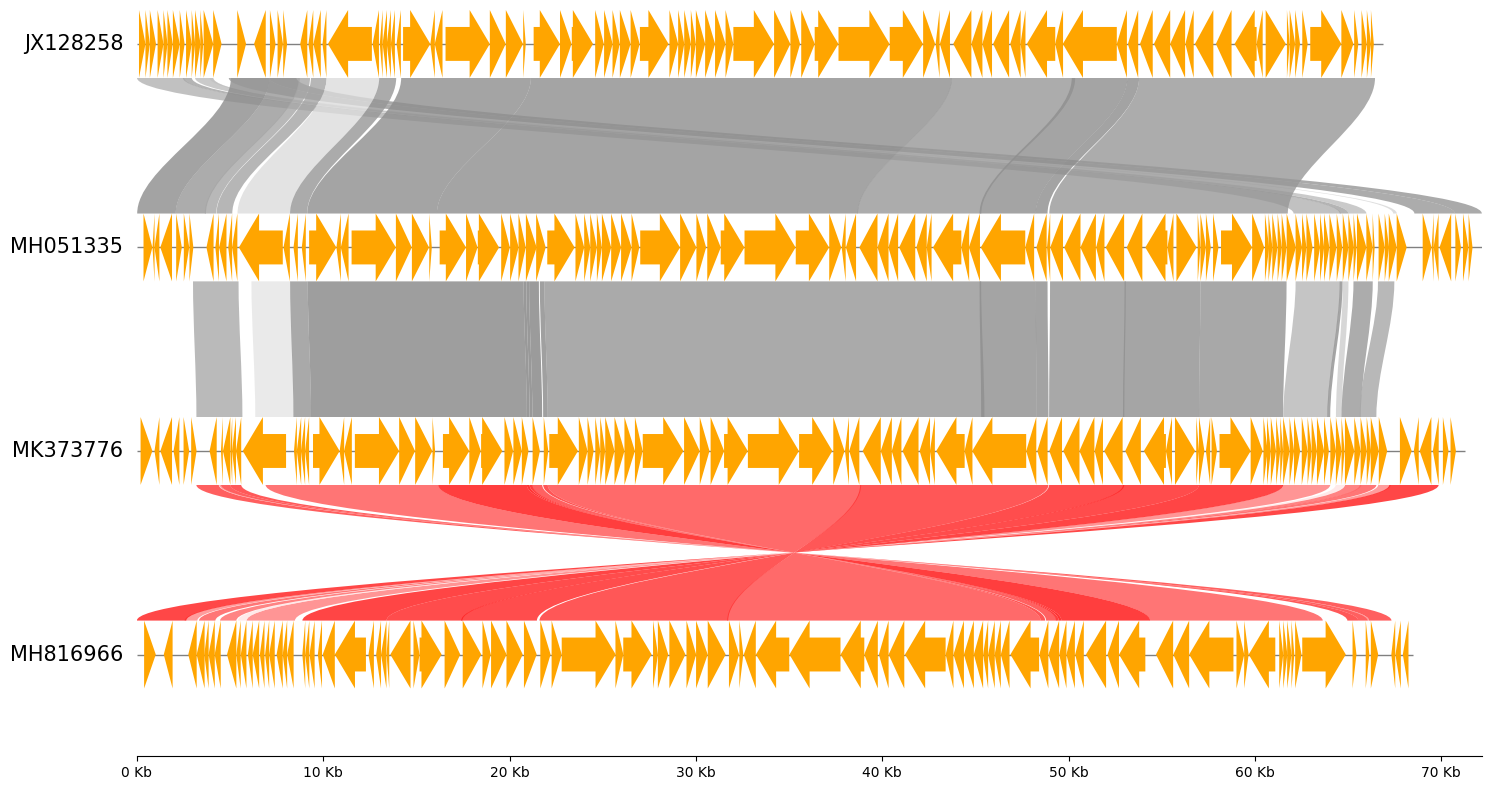

In [9]:
from pygenomeviz import Genbank, GenomeViz, load_dataset

gv = GenomeViz(
    feature_track_ratio=0.5,
    tick_track_ratio=0.5,
    tick_style="axis",
    tick_labelsize=10,
)

gbk_files, links = load_dataset("escherichia_phage")
for gbk_file in gbk_files:
    gbk = Genbank(gbk_file)
    track = gv.add_feature_track(gbk.name, gbk.genome_length, labelsize=15)
    track.add_genbank_features(gbk)

min_identity = int(min([link.identity for link in links]))
for link in links:
    link_data1 = (link.ref_name, link.ref_start, link.ref_end)
    link_data2 = (link.query_name, link.query_start, link.query_end)
    gv.add_link(link_data1, link_data2, v=link.identity, vmin=min_identity, curve=True)

fig = gv.plotfig()

### Genome Alignment & Visualization Workflow

As an additional option, pyGenomeViz implements a genome alignment function with [MUMmer](https://github.com/mummer4/mummer) (Linux/MacOS only).  
If MUMmer v3 or v4 is installed in your user environment, you can perform genome sequence comparison and visualization as follows.  

In [10]:
# MUMmer installation is required to run cell below
# In Colab environment, run apt-get command to install MUMmer
# !apt-get install mummer 

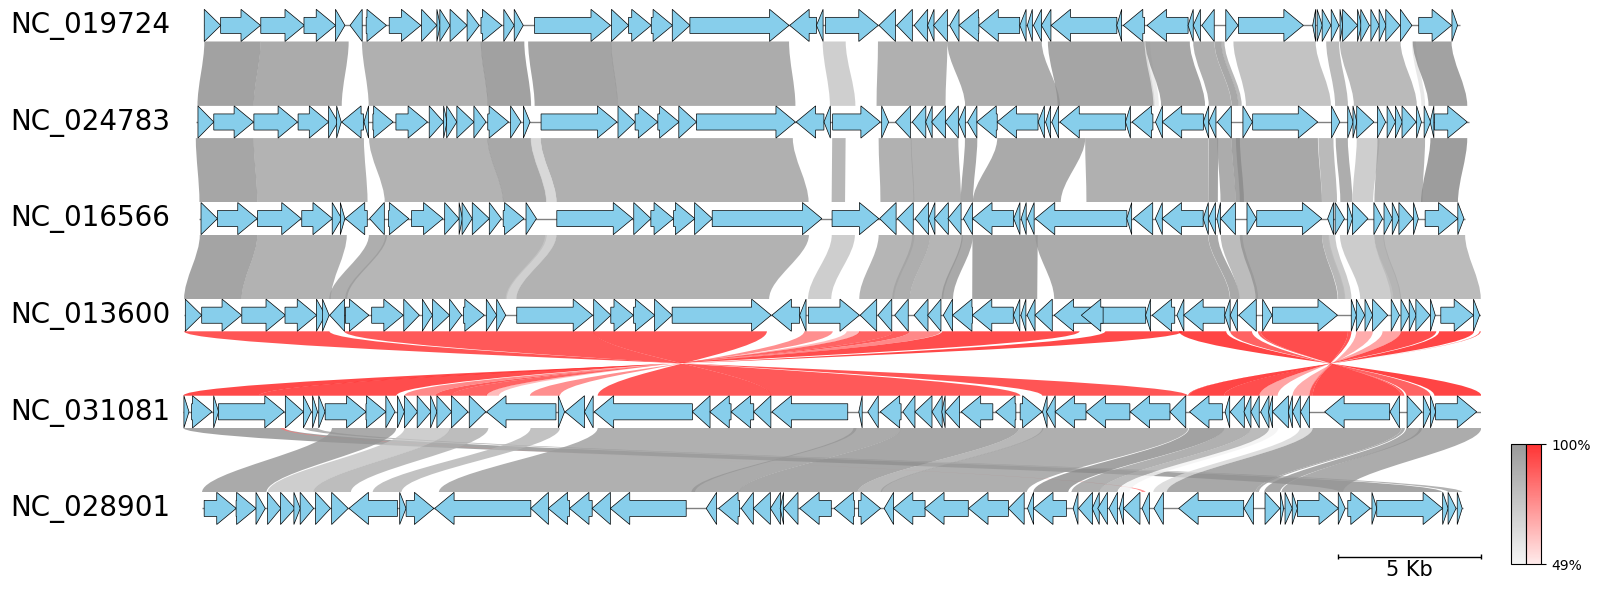

In [11]:
from pygenomeviz import Genbank, GenomeViz, load_dataset
from pygenomeviz.align import MUMmer, AlignCoord 
from tempfile import TemporaryDirectory

gv = GenomeViz(
    fig_track_height=0.5,
    feature_track_ratio=0.5,
    tick_track_ratio=0.5,
    align_type="center",
    tick_style="bar",
)

gbk_files, _ = load_dataset("enterobacteria_phage")
gbk_list = [Genbank(f) for f in gbk_files]
for gbk in gbk_list:
    track = gv.add_feature_track(gbk.name, gbk.genome_length)
    track.add_genbank_features(gbk, facecolor="skyblue", linewidth=0.5)

# Run MUMmer alignment
with TemporaryDirectory() as tmpdir:
    # seqtype='nucleotide'|'protein', maptype='one-to-one'|'many-to-many'
    align_coords = MUMmer(gbk_list, tmpdir, seqtype="protein", maptype="many-to-many").run()
    # Filter alignment results by 'min_length', 'min_identity' threshold
    align_coords = AlignCoord.filter(align_coords, min_length=0, min_identity=0)
    # Write alignment result as tsv format file
    AlignCoord.write(align_coords, f"{tmpdir}/align_coords.tsv")

min_identity = int(min([ac.identity for ac in align_coords]))
for ac in align_coords:
    link1 = (ac.ref_name, ac.ref_start, ac.ref_end)
    link2 = (ac.query_name, ac.query_start, ac.query_end)
    gv.add_link(link1, link2, curve=True, v=ac.identity, vmin=min_identity)

fig = gv.plotfig()

gv.set_colorbar(fig, vmin=min_identity)